In [1]:
import tensorflow as tf

In [2]:
tf.range(5)

<tf.Tensor 'range:0' shape=(5,) dtype=int32>

In [4]:
tf.linspace(0.,5,11) # staring number should be floating number

<tf.Tensor 'LinSpace_1:0' shape=(11,) dtype=float32>

In [5]:
tf.zeros((2,3)) # 상수 텐서

<tf.Tensor 'zeros:0' shape=(2, 3) dtype=float32>

In [6]:
tf.ones((2,3))

<tf.Tensor 'ones:0' shape=(2, 3) dtype=float32>

In [7]:
tf.fill([3,3], 5)

<tf.Tensor 'Fill:0' shape=(3, 3) dtype=int32>

In [9]:
x = tf.Variable([[1,2,3],[2,2,2]])

tf.zeros_like(x) #이렇게 하면 x랑 shape는 똑같은, 내용은 0 배열 생성

<tf.Tensor 'zeros_like_1:0' shape=(2, 3) dtype=int32>

In [14]:
tf.set_random_seed(777)
tf.random.shuffle([1,2,3,4])
# shuffle?
# tensorflow.org site api 확인

<tf.Tensor 'RandomShuffle_1:0' shape=(4,) dtype=int32>

In [15]:
tf.reshape(x,[3,2])

<tf.Tensor 'Reshape:0' shape=(3, 2) dtype=int32>

In [16]:
tf.transpose(x)

<tf.Tensor 'transpose:0' shape=(3, 2) dtype=int32>

In [21]:
r0 = tf.reshape(tf.range(12), (3,4))
sess = tf.Session()
print(sess.run(r0))
tmp = tf.random.shuffle([1,2,3,4])
print(sess.run(tmp)) # shuffled

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[3 2 1 4]


In [22]:
r1 = tf.slice(r0,[0,1],[2,3])
sess.run(r1)

array([[1, 2, 3],
       [5, 6, 7]])

In [24]:
s1, s2 = tf.split(r0, num_or_size_splits=2, axis=1)
print(sess.run(s1), sess.run(s2))

[[0 1]
 [4 5]
 [8 9]] [[ 2  3]
 [ 6  7]
 [10 11]]


In [26]:
r0 = tf.reshape(tf.range(12), (4,3))
s1, s2 = tf.split(r0, num_or_size_splits=2, axis=0)
print(sess.run(s1), sess.run(s2))

[[0 1 2]
 [3 4 5]] [[ 6  7  8]
 [ 9 10 11]]


In [30]:
a = tf.range(6, dtype=tf.int32)
b = 2*tf.ones(6, dtype=tf.int32)
print(sess.run(tf.add(a,b)))
print(sess.run(tf.subtract(a,b)))
print(sess.run(tf.multiply(a,b)))
print(sess.run(tf.divide(a,b)))

[2 3 4 5 6 7]
[-2 -1  0  1  2  3]
[ 0  2  4  6  8 10]
[0.  0.5 1.  1.5 2.  2.5]


In [32]:
# tf.abs()
# tf.square()
# tf.cumsum()
# tf.sqrt()
# tf.maximum()
# tf.minimum()

In [33]:
# tf.reduce_mean() # axis 설정된 축을 기준으로 평균 구하게 됨
# tf.reduce_sum()
# tf.reduce_min()
# tf.reduce_max()

In [36]:
x = tf.constant([[2.,0.],[0.,1.]])
y = tf.constant([[1.,1.],[1.,1.]])
z = tf.matmul(x,y)
print(sess.run(z))

[[2. 2.]
 [1. 1.]]


In [37]:
xinv = tf.linalg.inv(x) # float type이어야 함
print(sess.run(x))

[[2. 0.]
 [0. 1.]]


In [138]:
tf.set_random_seed(777)
# 회귀모델 (hf=wx+b)
## 그래프 생성 부분
xtrain = np.arange(3).reshape(-1,1)
ytrain = np.arange(3).reshape(-1,1)
x = tf.placeholder(dtype=tf.float32, shape=[None,1])
y = tf.placeholder(dtype=tf.float32, shape=[None,1])
b = tf.Variable(tf.random_uniform([1,1]), name='bias') # 이렇게 해야 2차원으로 만들어지네!
w = tf.Variable(tf.random_uniform([1,1]), name='weight')
hf = tf.matmul(x,w) + b
cost = tf.reduce_mean(tf.square(hf-y))
# 해봤듯이, 만약 직접 구현해보고 싶으면 grad = tf.reduce_mean((hf-ytrain)*x) 해서 for문 돌리면됨
# 아 reduce_mean을 하면 row/col 별로 mean을 계산하기 때문에 차원이 줄어드는(reduce)구나!

# opt = tf.train.GradientDescentOptimizer(0.01)
# train = opt.minimize(cost)

## 최적화기 생성 부분

train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

## 그래프 실행 부분
sess = tf.Session() # 세션 생성
sess.run(tf.global_variables_initializer()) # 변수 초기화

## 트레이닝
# for step in range(2001):
print("w : ",sess.run(w),"b : ",sess.run(b))
print("cost : ",sess.run(cost, feed_dict={x:xtrain,y:ytrain}))
sess.run(train, feed_dict={x:xtrain,y:ytrain})
print("step 1: ")
print("w : ",sess.run(w),"b : ",sess.run(b))
print("cost : ",sess.run(cost, feed_dict={x:xtrain,y:ytrain}))
sess.run(train, feed_dict={x:xtrain,y:ytrain})
print("step 2: ")
print("w : ",sess.run(w),"b : ",sess.run(b))
print("cost : ",sess.run(cost, feed_dict={x:xtrain,y:ytrain}))
sess.run(train, feed_dict={x:xtrain,y:ytrain})
print("step 3: ")
print("w : ",sess.run(w),"b : ",sess.run(b))
print("cost : ",sess.run(cost, feed_dict={x:xtrain,y:ytrain}))
    

w :  [[0.6689601]] b :  [[0.3961314]]
cost :  0.077295184
step 1: 
w :  [[0.6720721]] b :  [[0.39482957]]
cost :  0.07616696
step 2: 
w :  [[0.67510647]] b :  [[0.39349154]]
cost :  0.07507623
step 3: 
w :  [[0.67806643]] b :  [[0.3921196]]
cost :  0.07402023


In [139]:
for step in range(2001):
    sess.run(train, feed_dict={x:xtrain,y:ytrain})
    if step%200==0:
        print("step : ",step, "w : ",sess.run(w), "b : ",sess.run(b))
        print("cost : ",sess.run(cost,feed_dict={x:xtrain, y:ytrain}))

step :  0 w :  [[0.6809552]] b :  [[0.39071587]]
cost :  0.072996475
step :  200 w :  [[0.90394753]] b :  [[0.13326271]]
cost :  0.0075353174
step :  400 w :  [[0.9686635]] b :  [[0.04347714]]
cost :  0.00080204505
step :  600 w :  [[0.98977655]] b :  [[0.01418428]]
cost :  8.5367676e-05
step :  800 w :  [[0.99666464]] b :  [[0.0046276]]
cost :  9.086312e-06
step :  1000 w :  [[0.9989119]] b :  [[0.00150965]]
cost :  9.66978e-07
step :  1200 w :  [[0.999645]] b :  [[0.00049251]]
cost :  1.02924524e-07
step :  1400 w :  [[0.99988407]] b :  [[0.00016074]]
cost :  1.0970804e-08
step :  1600 w :  [[0.9999621]] b :  [[5.2693584e-05]]
cost :  1.1766532e-09
step :  1800 w :  [[0.9999868]] b :  [[1.7631746e-05]]
cost :  1.3535426e-10
step :  2000 w :  [[0.9999956]] b :  [[5.884765e-06]]
cost :  1.5186201e-11


In [140]:
sess.run(hf, feed_dict = {x:xtrain}) # 테스트

array([[5.8847650e-06],
       [1.0000014e+00],
       [1.9999970e+00]], dtype=float32)

In [102]:
np.array([1,2,3], dtype=np.float32).reshape(-1,1)

array([[1.],
       [2.],
       [3.]], dtype=float32)

In [148]:
tf.set_random_seed(777)
# 회귀모델 (hf=wx+b)
## 그래프 생성 부분
xtrain = np.array([[0,1],[1,1],[2,1]]) # 하나당 하나의 b까지 포함
ytrain = np.arange(3).reshape(-1,1)
x = tf.placeholder(dtype=tf.float32, shape=[None,2])
y = tf.placeholder(dtype=tf.float32, shape=[None,1])
# b = tf.Variable(tf.random_uniform([1,1]), name='bias') # 이렇게 해야 2차원으로 만들어지네!
w = tf.Variable(tf.random_uniform([2,1]), name='weight')
hf = tf.matmul(x,w)
cost = tf.reduce_mean(tf.square(hf-y))
# 해봤듯이, 만약 직접 구현해보고 싶으면 grad = tf.reduce_mean((hf-ytrain)*x) 해서 for문 돌리면됨
# 아 reduce_mean을 하면 row/col 별로 mean을 계산하기 때문에 차원이 줄어드는(reduce)구나!

# opt = tf.train.GradientDescentOptimizer(0.01)
# train = opt.minimize(cost)

## 최적화기 생성 부분

train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

## 그래프 실행 부분
sess = tf.Session() # 세션 생성
sess.run(tf.global_variables_initializer()) # 변수 초기화

for step in range(20001):
    sess.run([cost, w, train], feed_dict = {x:xtrain, y:ytrain})
    if step%2000==0:
        print("step : ",step, "w : ",sess.run(w))
        print("cost : ",sess.run(cost,feed_dict={x:xtrain, y:ytrain}))

step :  0 w :  [[0.9676638]
 [0.7039445]]
cost :  0.4517549
step :  2000 w :  [[9.9999505e-01]
 [6.8123950e-06]]
cost :  1.9884414e-11
step :  4000 w :  [[9.9999785e-01]
 [2.1457840e-06]]
cost :  3.069569e-12
step :  6000 w :  [[9.9999785e-01]
 [2.1457840e-06]]
cost :  3.069569e-12
step :  8000 w :  [[9.9999785e-01]
 [2.1457840e-06]]
cost :  3.069569e-12
step :  10000 w :  [[9.9999785e-01]
 [2.1457840e-06]]
cost :  3.069569e-12
step :  12000 w :  [[9.9999785e-01]
 [2.1457840e-06]]
cost :  3.069569e-12
step :  14000 w :  [[9.9999785e-01]
 [2.1457840e-06]]
cost :  3.069569e-12
step :  16000 w :  [[9.9999785e-01]
 [2.1457840e-06]]
cost :  3.069569e-12
step :  18000 w :  [[9.9999785e-01]
 [2.1457840e-06]]
cost :  3.069569e-12
step :  20000 w :  [[9.9999785e-01]
 [2.1457840e-06]]
cost :  3.069569e-12


In [143]:
np.array([0,1,2,1,1,1]).reshape(-1,2)

array([[0, 1],
       [2, 1],
       [1, 1]])

In [334]:
tf.set_random_seed(777)
# 회귀모델 (hf=wx+b)
## 그래프 생성 부분
xtrain = np.array([[1,2,3],[1,1,1]]) # 하나당 하나의 b까지 포함
ytrain = np.array([1,2,3]).reshape(1,-1)
x = tf.placeholder(dtype=tf.float32, shape=[2,None])
y = tf.placeholder(dtype=tf.float32, shape=[1,None])
# b = tf.Variable(tf.random_uniform([1,1]), name='bias') # 이렇게 해야 2차원으로 만들어지네!
w = tf.Variable(tf.random_uniform([1,2]), name='weight')
hf = tf.matmul(w,x)
cost = tf.reduce_mean(tf.square(hf-y))
# 해봤듯이, 만약 직접 구현해보고 싶으면 grad = tf.reduce_mean((hf-ytrain)*x) 해서 for문 돌리면됨
# 아 reduce_mean을 하면 row/col 별로 mean을 계산하기 때문에 차원이 줄어드는(reduce)구나!

# opt = tf.train.GradientDescentOptimizer(0.01)
# train = opt.minimize(cost)

## 최적화기 생성 부분

train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

## 그래프 실행 부분
sess = tf.Session() # 세션 생성
sess.run(tf.global_variables_initializer()) # 변수 초기화

for step in range(20001):
    sess.run([cost, w, train], feed_dict = {x:xtrain, y:ytrain})
    if step%2000==0:
        print("step : ",step, "w : ",sess.run(w))
        print("cost : ",sess.run(cost,feed_dict={x:xtrain, y:ytrain}))

print(sess.run(hf,feed_dict={x:[[200],[1]]}))

step :  0 w :  [[0.4050274  0.23426989]]
cost :  1.1493102
step :  2000 w :  [[0.99851584 0.00337377]]
cost :  1.6327994e-06
step :  4000 w :  [[9.9998784e-01 2.7525937e-05]]
cost :  1.0939042e-10
step :  6000 w :  [[9.9999785e-01 4.3508016e-06]]
cost :  3.0695446e-12
step :  8000 w :  [[9.9999785e-01 4.3508016e-06]]
cost :  3.0695446e-12
step :  10000 w :  [[9.9999785e-01 4.3508016e-06]]
cost :  3.0695446e-12
step :  12000 w :  [[9.9999785e-01 4.3508016e-06]]
cost :  3.0695446e-12
step :  14000 w :  [[9.9999785e-01 4.3508016e-06]]
cost :  3.0695446e-12
step :  16000 w :  [[9.9999785e-01 4.3508016e-06]]
cost :  3.0695446e-12
step :  18000 w :  [[9.9999785e-01 4.3508016e-06]]
cost :  3.0695446e-12
step :  20000 w :  [[9.9999785e-01 4.3508016e-06]]
cost :  3.0695446e-12
[[199.99957]]


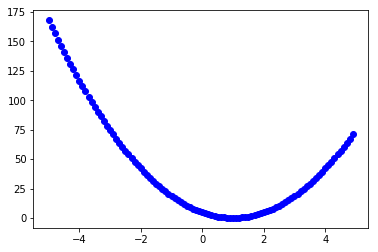

In [159]:
import matplotlib.pyplot as plt

# 시각화
tf.set_random_seed(777)
## 그래프 생성 부분
xtrain = [1,2,3]
ytrain = [1,2,3]
w = tf.placeholder(tf.float32)
hf = xtrain*w
cost = tf.reduce_mean(tf.square(hf-ytrain))

## 그래프 실행 부분
sess = tf.Session() # 세션 생성
sess.run(tf.global_variables_initializer()) # 변수 초기화

wvList = []
cvList = []

for step in range(-50,50):
    fw = step*0.1
    cv, wv = sess.run([cost, w], feed_dict={w:fw})
    wvList.append(wv)
    cvList.append(cv)

plt.plot(wvList, cvList, 'bo')

In [183]:
import matplotlib.pyplot as plt

# 시각화
tf.set_random_seed(777)
## 그래프 생성 부분
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
b = tf.Variable([12312.], tf.float32)
w = tf.Variable([-2233.], tf.float32)

hf = x*w+b
loss = tf.reduce_sum(tf.square(hf-y))

# train = tf.train.GradientDescentOptimizer(0.1).minimize(loss) 
# 만약 일케하면 무한대로 튀어버림!
train = tf.train.GradientDescentOptimizer(0.02).minimize(loss) 
xtrain = [1,2,3,4]
ytrain = [-1,-2,-3,-4]

## 그래프 실행 부분
sess = tf.Session() # 세션 생성
sess.run(tf.global_variables_initializer()) # 변수 초기화

for step in range(2001):
    sess.run(train, feed_dict={x:xtrain,y:ytrain})
    if step % 200==0:
        wv, bv, lv = sess.run([w,b,loss],feed_dict={x:xtrain,y:ytrain})
        print("step : {} | w: {}, b: {}, loss: {}".format(step,wv,bv,lv))
        
print("predict: {}".format(sess.run(hf,feed_dict={x:[100]})))

step : 0 | w: [-4479.4], b: [11234.88], loss: 100286368.0
step : 200 | w: [-31.491865], b: [89.6498], loss: 5369.169921875
step : 400 | w: [-1.23905], b: [0.7028361], loss: 0.3300020396709442
step : 600 | w: [-1.0018741], b: [0.00551014], loss: 2.028219932981301e-05
step : 800 | w: [-1.0000147], b: [4.3143336e-05], loss: 1.2510810165622388e-09
step : 1000 | w: [-1.0000002], b: [6.285399e-07], loss: 4.156675004196586e-13
step : 1200 | w: [-1.0000002], b: [6.2377154e-07], loss: 3.694822225952521e-13
step : 1400 | w: [-1.0000002], b: [6.2377154e-07], loss: 3.694822225952521e-13
step : 1600 | w: [-1.0000002], b: [6.2377154e-07], loss: 3.694822225952521e-13
step : 1800 | w: [-1.0000002], b: [6.2377154e-07], loss: 3.694822225952521e-13
step : 2000 | w: [-1.0000002], b: [6.2377154e-07], loss: 3.694822225952521e-13
predict: [-100.00002]


In [190]:
xtrain = [1,2,3]
ytrain = [1,2,3]
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
w = tf.Variable(5.0)
hf = x*w
loss = tf.reduce_mean(tf.square(hf-y))
# train = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

lr = 0.01
gradient = tf.reduce_mean((hf-y)*x)
descent = w - lr*gradient
update = w.assign(descent) # '그래프' 구조이기 때문에 값을 갱신해주려면 assign함수 사용해야 함!
    
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2000):
    sess.run(update, feed_dict={x:xtrain,y:ytrain})
    # w = sess.run(descent) # 하면 에러남!
    if step%200==0:
        print(step, sess.run(w,feed_dict={x:xtrain}))

print(sess.run(hf, feed_dict={x:100}))

0 4.8133335
200 1.0002693
400 1.0000012
600 1.0000012
800 1.0000012
1000 1.0000012
1200 1.0000012
1400 1.0000012
1600 1.0000012
1800 1.0000012
100.00012


In [313]:
tf.set_random_seed(777)
## 그래프 생성 부분
xtrain = np.array([[1,2,3],[1,1,1]]) # 하나당 하나의 b까지 포함
ytrain = np.array([1,2,3]).reshape(1,-1)
x = tf.placeholder(dtype=tf.float32, shape=[2,None]) 
y = tf.placeholder(dtype=tf.float32, shape=[1,None])
# b = tf.Variable(tf.random_uniform([1,1]), name='bias') # 이렇게 해야 2차원으로 만들어지네!
w = tf.Variable(tf.random_uniform([1,2]), name='weight')
hf = tf.matmul(w,x)
cost = tf.reduce_mean(tf.square(hf-y))

lr = 0.01
gradient = tf.reduce_mean((hf-y)*xtrain[0]) # 요기가 잘못!!! 위의 한줄만 곱해줘야!!
descent = w - lr*gradient
update = w.assign(descent)

## 최적화기 생성 부분

# train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

## 그래프 실행 부분
sess = tf.Session() # 세션 생성
sess.run(tf.global_variables_initializer()) # 변수 초기화

for step in range(2001):
    sess.run([cost, w, update], feed_dict = {x:xtrain, y:ytrain})
    if step%200==0:
        print("step : ",step, "w : ",sess.run(w))
        print("cost : ",sess.run(cost,feed_dict={x:xtrain, y:ytrain}))
        print("gradient: ",sess.run(gradient,feed_dict={x:xtrain, y:ytrain}))

print(sess.run(hf,feed_dict={x:[[200],[1]]}))

step :  0 w :  [[0.54072976 0.9987931 ]]
cost :  0.14705992
gradient:  -0.14567487
step :  200 w :  [[0.5625806 1.020644 ]]
cost :  0.1488163
gradient:  -2.7020772e-06
step :  400 w :  [[0.5625806 1.020644 ]]
cost :  0.1488163
gradient:  -2.7020772e-06
step :  600 w :  [[0.5625806 1.020644 ]]
cost :  0.1488163
gradient:  -2.7020772e-06
step :  800 w :  [[0.5625806 1.020644 ]]
cost :  0.1488163
gradient:  -2.7020772e-06
step :  1000 w :  [[0.5625806 1.020644 ]]
cost :  0.1488163
gradient:  -2.7020772e-06
step :  1200 w :  [[0.5625806 1.020644 ]]
cost :  0.1488163
gradient:  -2.7020772e-06
step :  1400 w :  [[0.5625806 1.020644 ]]
cost :  0.1488163
gradient:  -2.7020772e-06
step :  1600 w :  [[0.5625806 1.020644 ]]
cost :  0.1488163
gradient:  -2.7020772e-06
step :  1800 w :  [[0.5625806 1.020644 ]]
cost :  0.1488163
gradient:  -2.7020772e-06
step :  2000 w :  [[0.5625806 1.020644 ]]
cost :  0.1488163
gradient:  -2.7020772e-06
[[113.53676]]


In [314]:
xtrain[0]

array([1, 2, 3])

In [321]:
tf.set_random_seed(777)
## 그래프 생성 부분
xtrain = np.array([[0.,1.,2.]]) # 하나당 하나의 b까지 포함
ytrain = np.array([0.,1.,2.]).reshape(1,-1)
x = tf.placeholder(dtype=tf.float32, shape=[1,None])
y = tf.placeholder(dtype=tf.float32, shape=[1,None])
b = tf.Variable(0.001)
# b = tf.Variable(tf.random_uniform([1,1]), name='bias') # 이렇게 해야 2차원으로 만들어지네!
w = tf.Variable(tf.random_uniform([1,1],-1,1), name='weight')
hf = tf.matmul(w,x) + b
cost = tf.reduce_mean(tf.square(hf-y))

lr = 0.001
gradient = tf.reduce_mean((hf-y)*x)
descent = w - lr*gradient
update = w.assign(descent)

## 최적화기 생성 부분

# train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

## 그래프 실행 부분
sess = tf.Session() # 세션 생성
sess.run(tf.global_variables_initializer()) # 변수 초기화

for step in range(20001):
    sess.run([cost, w, update], feed_dict = {x:xtrain, y:ytrain})
    if step%2000==0:
        print("step : ",step, "w : ",sess.run(w))
        print("cost : ",sess.run(cost,feed_dict={x:xtrain, y:ytrain}))

print(sess.run(hf,feed_dict={x:[[200.]]}))
# 않위 이거 외 이런거임

step :  0 w :  [[0.19995947]]
cost :  1.0651757
step :  2000 w :  [[0.97095984]]
cost :  0.0013484694
step :  4000 w :  [[0.9983882]]
cost :  2.1062651e-06
step :  6000 w :  [[0.9993612]]
cost :  4.0249515e-07
step :  8000 w :  [[0.99938214]]
cost :  4.0053632e-07
step :  10000 w :  [[0.99938214]]
cost :  4.0053632e-07
step :  12000 w :  [[0.99938214]]
cost :  4.0053632e-07
step :  14000 w :  [[0.99938214]]
cost :  4.0053632e-07
step :  16000 w :  [[0.99938214]]
cost :  4.0053632e-07
step :  18000 w :  [[0.99938214]]
cost :  4.0053632e-07
step :  20000 w :  [[0.99938214]]
cost :  4.0053632e-07
[[199.87744]]


In [243]:
import numpy as np
num_points = 200
vectors_set = []
for i in range(num_points):
    x = np.random.normal(5,5)+15
    y = x*1000+np.random.normal(0,3)*1000
    vectors_set.append([x,y])
xdata = [v[0] for v in vectors_set]
ydata = [v[1] for v in vectors_set]

W0729 15:03:48.711123 11520 legend.py:1289] No handles with labels found to put in legend.


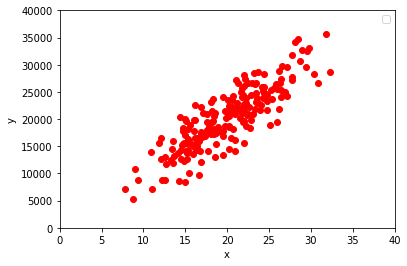

In [244]:
plt.plot(xdata,ydata,'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,40)
plt.ylim(0,40000)
plt.legend()

In [245]:
w = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = w*xdata+b
loss = tf.reduce_mean(tf.square(y-ydata))
train = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
# 이거 train rl 0.01만 줘도 봐로 overshooting나!
sess.run(tf.initialize_all_variables())

0 [855.27655] [40.3836]
0 18748562.0


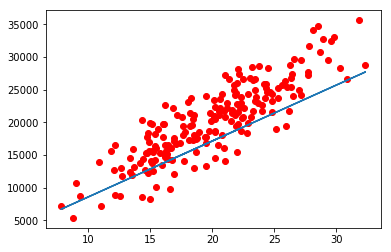

1 [985.56964] [46.499786]
1 8946255.0


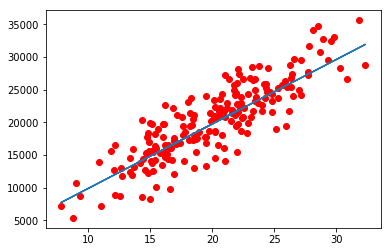

2 [1005.4128] [47.397594]
2 8718934.0


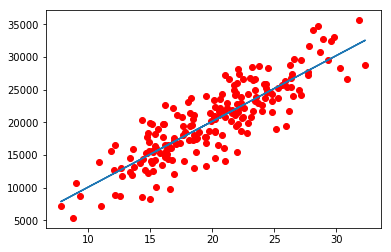

3 [1008.43616] [47.50073]
3 8713660.0


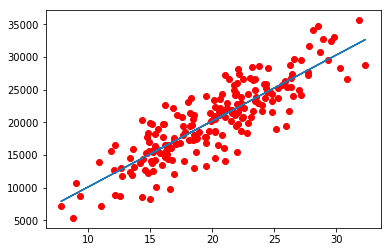

4 [1008.8982] [47.482853]
4 8713537.0


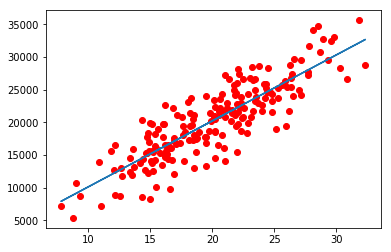

5 [1008.97015] [47.446552]
5 8713532.0


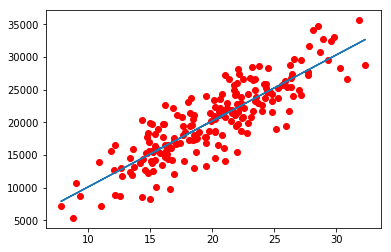

6 [1008.98267] [47.407448]
6 8713530.0


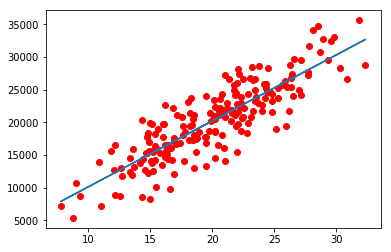

7 [1008.98615] [47.36792]
7 8713530.0


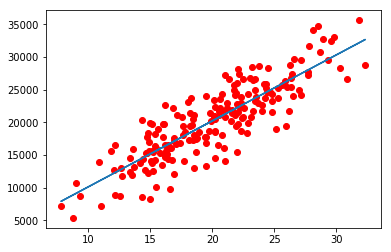

8 [1008.9883] [47.328335]
8 8713528.0


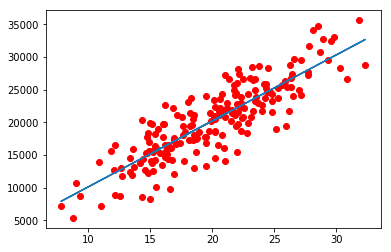

9 [1008.9902] [47.288742]
9 8713526.0


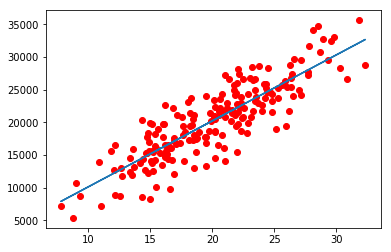

In [246]:
for step in range(10):
    sess.run(train)
    print(step, sess.run(w), sess.run(b))
    print(step, sess.run(loss))
    plt.plot(xdata, ydata, 'ro')
    plt.plot(xdata, sess.run(w)*xdata+sess.run(b))
    plt.show()

In [322]:
# keras package : tensorflow를 엔진으로 사용하는 파이썬 패키지
# 신경망을 쉽게 구현
# 연습용 데이터셋 구성 (CIFAR10, CIFAR100, 영화, 뉴스, 보스턴 데이터)
from tensorflow import keras
mnist = keras.datasets.mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

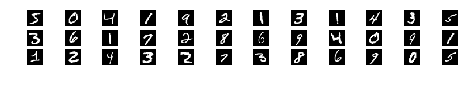

In [323]:
plt.figure(figsize=(8,1))
for i in range(36):
    plt.subplot(3,12,i+1)
    plt.imshow(xtrain[i], cmap='gray')
    plt.axis('off')
plt.show()

In [324]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [325]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [326]:
# x값 변환
xtrain = xtrain.reshape(60000,28*28).astype('float32')/255.0
xtest = xtrain.reshape(60000,28*28).astype('float32')/255.0

In [327]:
from tensorflow.keras.utils import to_categorical
ytrain = to_categorical(ytrain,10)
ytest = to_categorical(ytest,10)
ytrain[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [328]:
# keras로 신경망 구성하는 순서
# 1. sequential class -> 객체 생성
# 2. add 메서드 -> 층(레이어)을 추가 : 입력부터 순서대로 추가
# shape 체크 : #output node = #input node
# activation : 활성화 설정
# 3. compile 메서드 => 모델 생성
# loss, optimizer(알고리즘), 성능 기중 설정
# fit 메서드 => 트레이닝
# 에폭 설정(6만개 데이터 있다면 1에폭 : 6만개 training)
# batch 설정 : 배치설정 # 메모리 (분할 모델링 / 큐러너 등 사용)

In [329]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
np.random.seed(0)

In [330]:
model = Sequential() # sequential 객체 생성하고
model.add(Dense(15, input_dim=784, activation='sigmoid')) # 거기에 Dense라는 층 추가
# input_dim은 맨 처음거에만 있음
model.add(Dense(10, activation='sigmoid')) # 출력=10
model.compile(optimizer=SGD(lr=0.1), loss='mean_squared_error', metrics=['accuracy'])

W0729 16:16:20.404804 11520 deprecation.py:506] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [331]:
model.summary()
# 모델은 이렇게 만들면된다
# 케라스 모델 만들기 엄청 쉬운데...?

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                11775     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [332]:
model.fit(xtrain,ytrain)

60000/60000 [==============================] - 2s 32us/sample - loss: 0.0949 - acc: 0.3259


In [333]:
model.predict(xtest) # 뭐 별로별로

array([[0.22533455, 0.25036567, 0.18042761, ..., 0.21262762, 0.18657693,
        0.20076567],
       [0.22576532, 0.25034648, 0.18042445, ..., 0.21254551, 0.1866718 ,
        0.20074016],
       [0.22555453, 0.25061768, 0.18075699, ..., 0.21303952, 0.18711212,
        0.20107025],
       ...,
       [0.22533455, 0.2503488 , 0.1805177 , ..., 0.2129066 , 0.18688482,
        0.20091048],
       [0.22547981, 0.25062415, 0.1806958 , ..., 0.21300915, 0.18689263,
        0.20108268],
       [0.22543198, 0.2505614 , 0.18060884, ..., 0.21289372, 0.1868599 ,
        0.20101812]], dtype=float32)